<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-assignments-1-3/blob/main/NeuralNetwork(Gasturbines1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
path = r"/content/gas_turbines.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
upper_bound = data.drop('TEY', axis=1).quantile(0.95)
lower_bound = data.drop('TEY', axis=1).quantile(0.05)
data_clipped = data.drop('TEY', axis=1).clip(lower=lower_bound, upper=upper_bound, axis=1)
data_clipped['TEY'] = data['TEY']

In [5]:
print(data_clipped.head())
print(data_clipped.describe())

       AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   

      NOX     TEY  
0  82.722  114.70  
1  82.776  114.72  
2  82.468  114.71  
3  82.670  114.72  
4  82.311  114.72  
                 AT            AP            AH          AFDP          GTEP  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean      17.746139   1013.243141     79.300111      4.197881     25.401286   
std        7.300397      5.752154     13.031200      0.702682      4.065284   
min        5.641410   1003.600000     52.868800      2.981780     19.341000   
25%       11.408000   

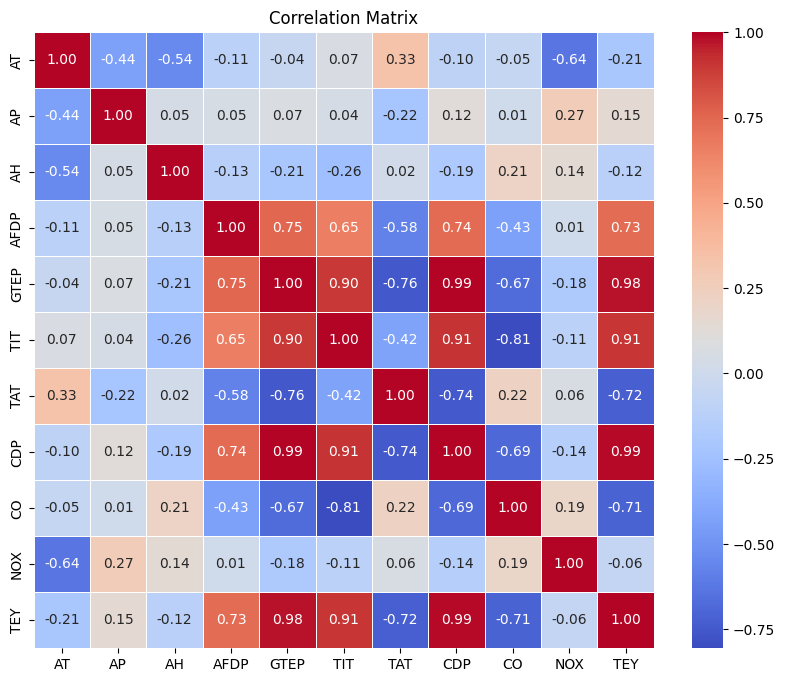

In [6]:
correlation_matrix = data_clipped.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

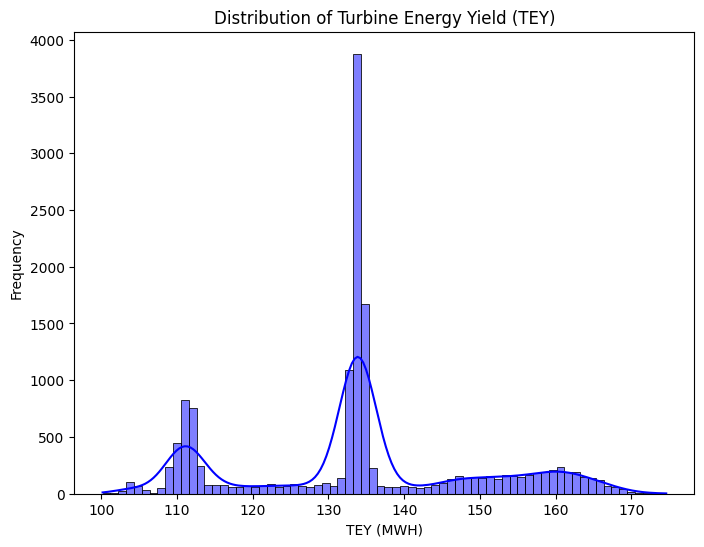

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(data_clipped['TEY'], kde=True, color='blue')
plt.title('Distribution of Turbine Energy Yield (TEY)')
plt.xlabel('TEY (MWH)')
plt.ylabel('Frequency')
plt.show()

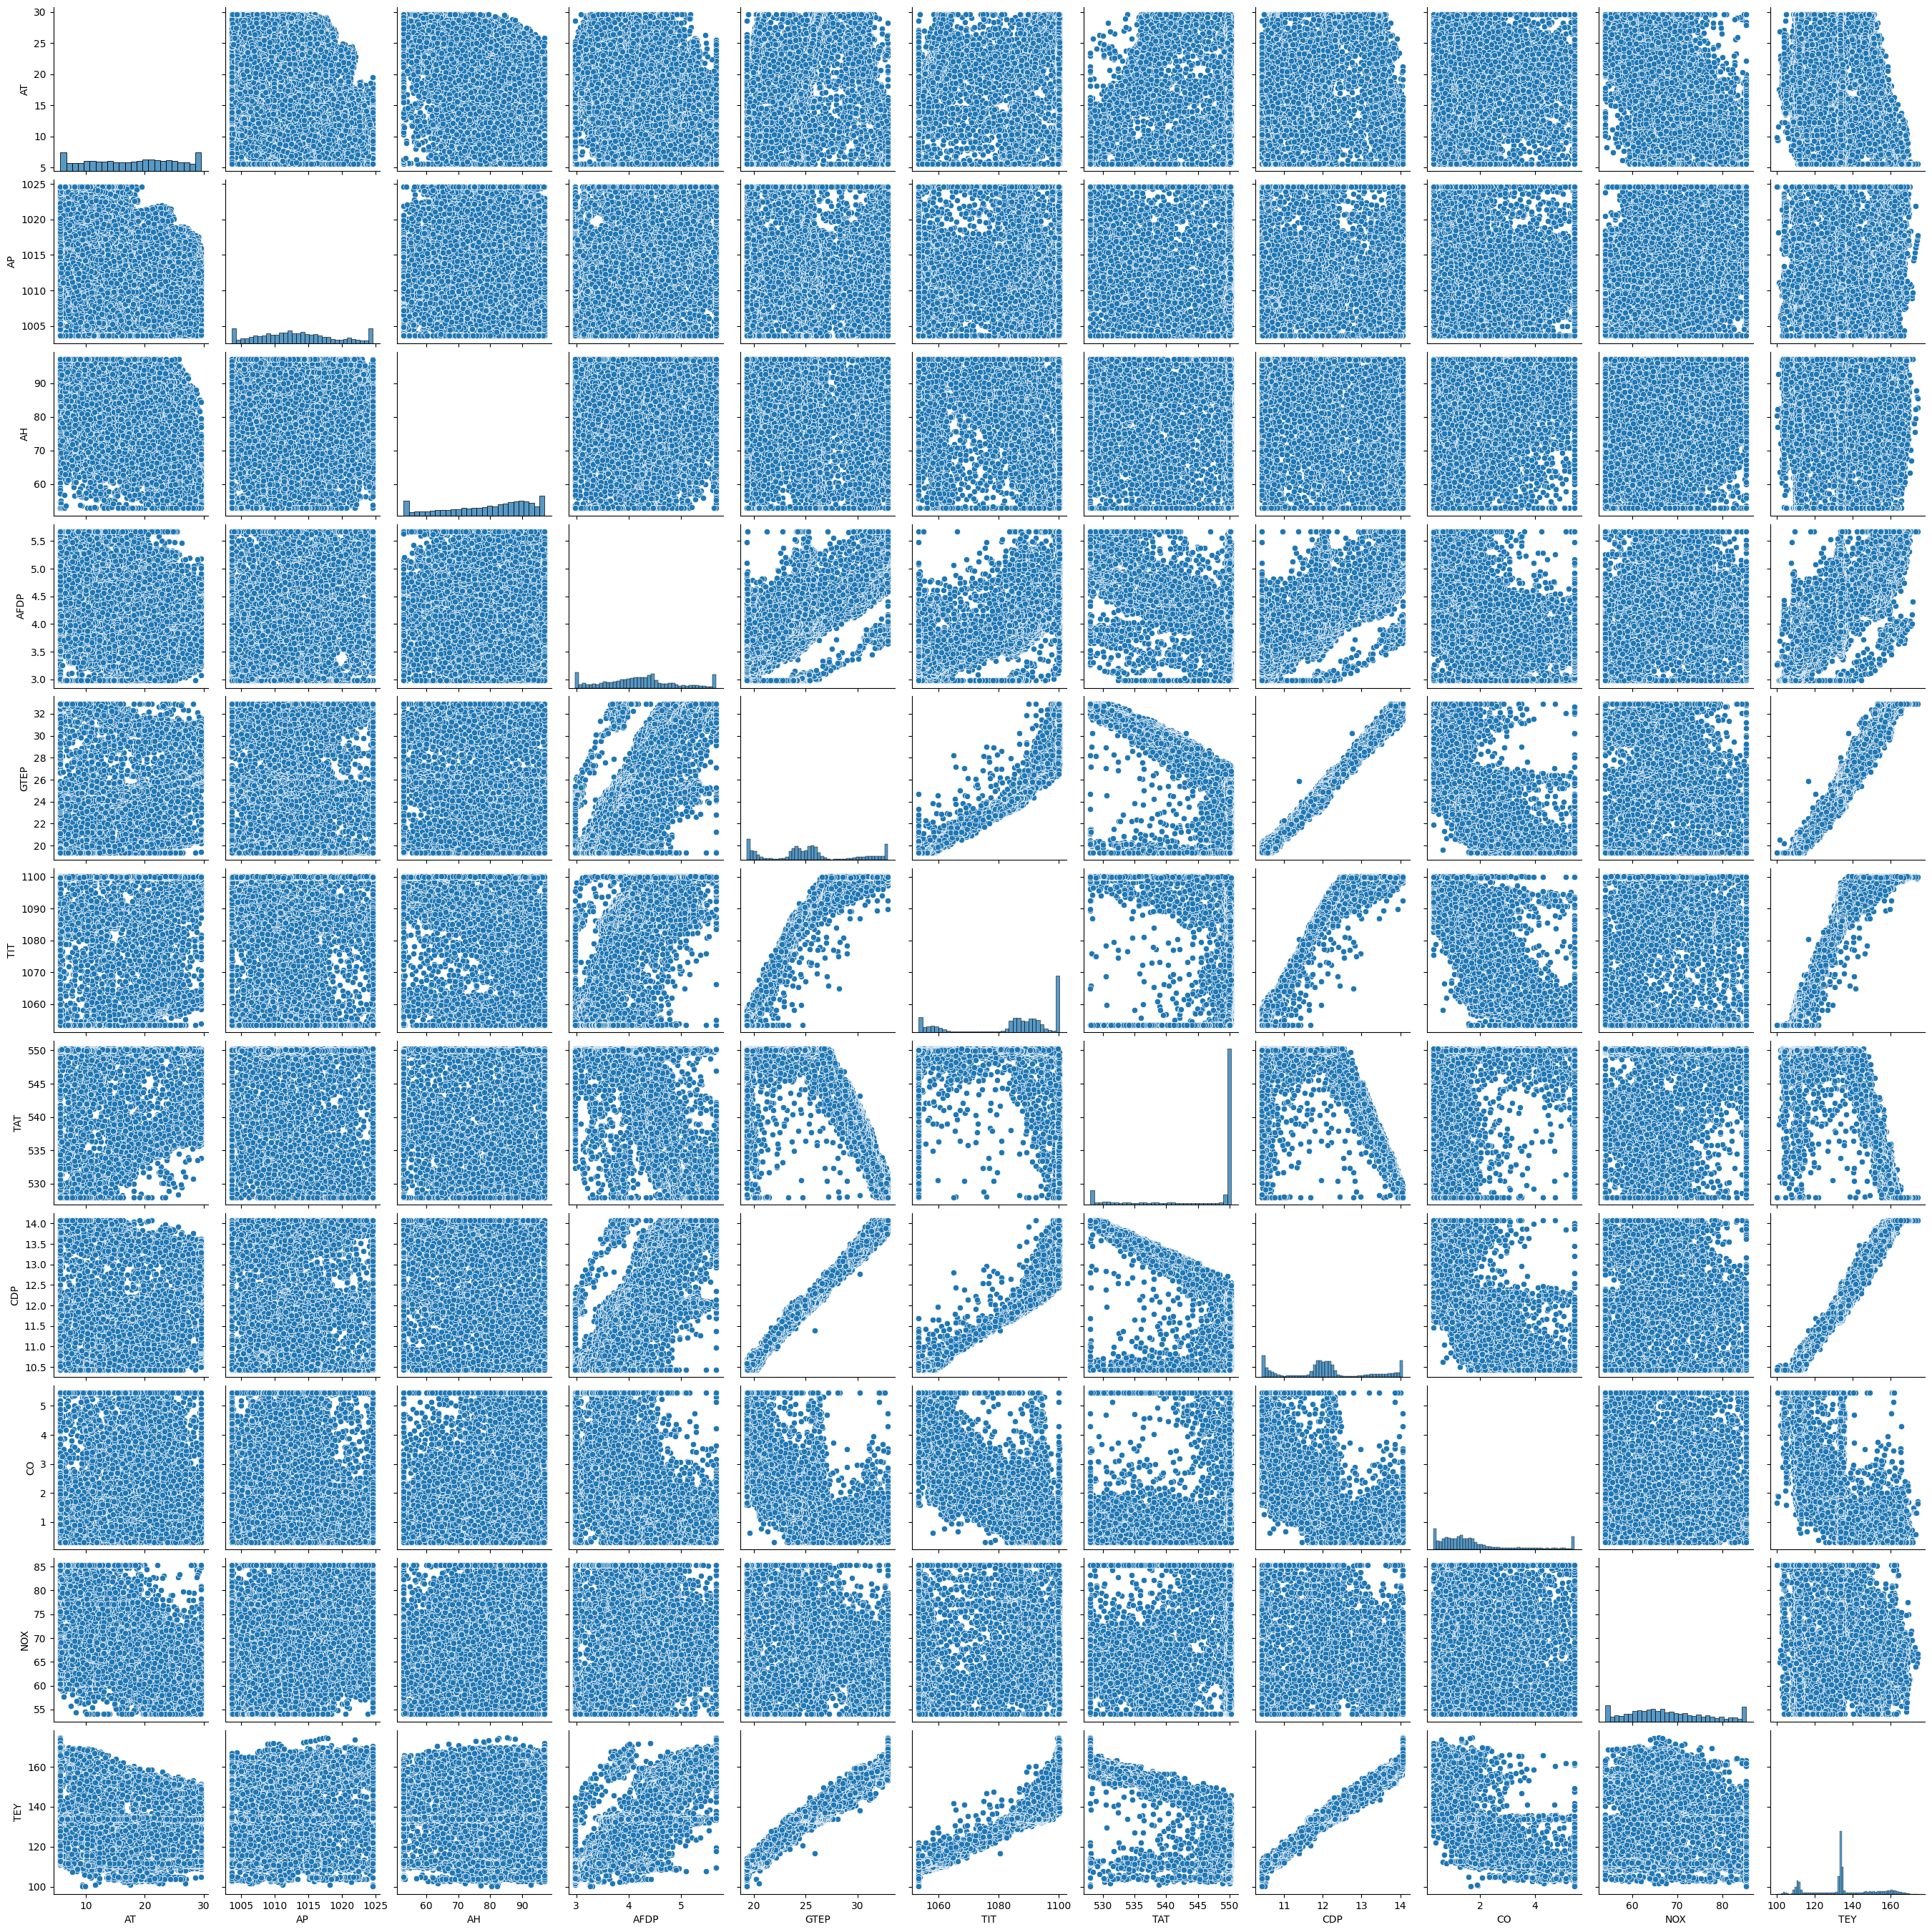

In [8]:
sns.pairplot(data_clipped)
plt.show()

In [9]:
X = data_clipped.drop('TEY', axis=1)
y = data_clipped['TEY']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
301/301 [==============================] - 2s 5ms/step - loss: 0.7483 - val_loss: 0.6794
Epoch 2/30
301/301 [==============================] - 1s 2ms/step - loss: 0.7632 - val_loss: 0.8677
Epoch 3/30
301/301 [==============================] - 1s 2ms/step - loss: 0.7735 - val_loss: 0.6356
Epoch 4/30
301/301 [==============================] - 1s 3ms/step - loss: 0.7579 - val_loss: 0.7072
Epoch 5/30
301/301 [==============================] - 1s 3ms/step - loss: 0.7171 - val_loss: 0.6952
Epoch 6/30
301/301 [==============================] - 1s 4ms/step - loss: 0.7812 - val_loss: 0.7004
Epoch 7/30
301/301 [==============================] - 1s 2ms/step - loss: 0.7780 - val_loss: 0.8569
Epoch 8/30
301/301 [==============================] - 1s 2ms/step - loss: 0.7204 - val_loss: 0.6871
Epoch 9/30
301/301 [==============================] - 1s 2ms/step - loss: 0.7613 - val_loss: 0.9213
Epoch 10/30
301/301 [==============================] - 1s 2ms/step - loss: 0.7329 - val_loss: 0.6550

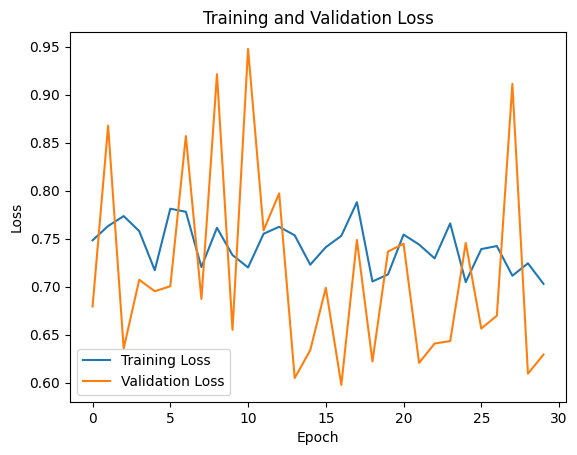

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

94/94 [==============================] - 1s 6ms/step
Mean Squared Error (MSE): 0.6278136291927372


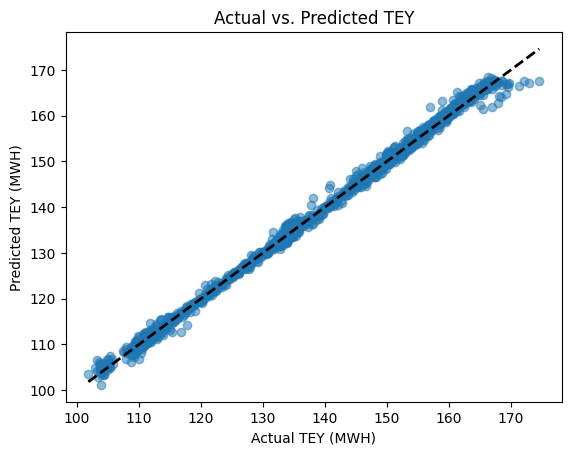

In [22]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual TEY (MWH)')
plt.ylabel('Predicted TEY (MWH)')
plt.title('Actual vs. Predicted TEY')
plt.show()

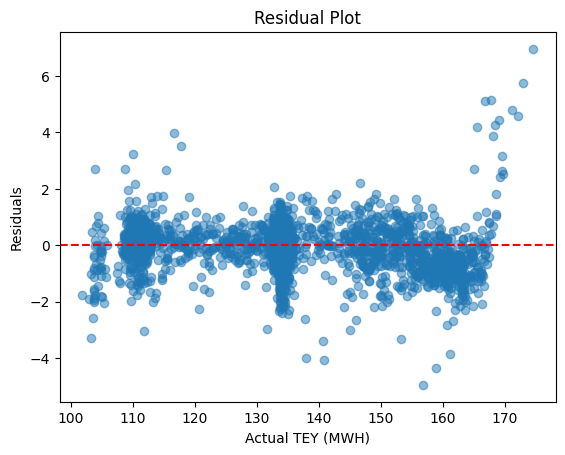

In [24]:
residuals = y_test - y_pred.flatten()
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual TEY (MWH)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

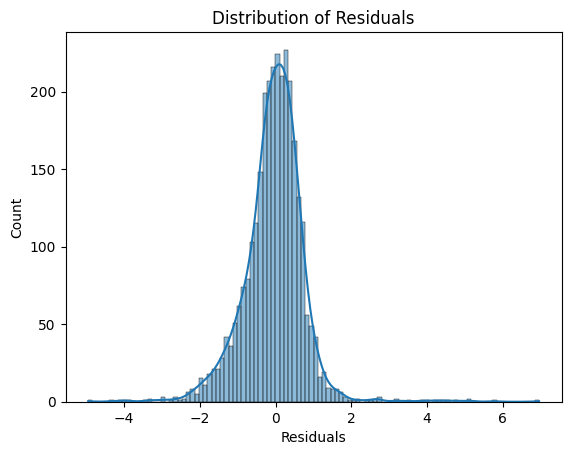

In [25]:
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()